In [34]:
import numpy as np
import matplotlib.pyplot as plt
import bokeh
import bokeh.plotting as blt
bokeh.io.output_notebook()
import causticTools.io as cIo
from causticTools.cythonMisc import findSmoothDens
%matplotlib inline

Loading BokehJS ...

In [37]:
def getData(power,nRad,nPhase,nEcc,whichOutput):
    data=np.genfromtxt('output/Kepler'+str(power)+'.r'+str(nRad)+'p'+str(nPhase)+'e'+str(nEcc)
                       +'.'+str(whichOutput)+'_8.txt')
    return data

def getDens(power,nRad,nPhase,nEcc,whichOutput,smoothLength=1,rMin=50,rMax=500,nBin=1000,makePlot=0):
    data=getData(power,nRad,nPhase,nEcc,whichOutput)
    rads=np.linspace(rMin,rMax,nBin)
    dens=findSmoothDens(rads,nBin,data,smoothLength)
    if makePlot==1:
        fig=blt.figure(x_range=(rMin,rMax),y_range=(0,5),width=500,height=250)
        fig=cIo.plotDensProfile(fig,rads,dens,rMin,rMax,0.5)
        blt.show(fig)
    return rads,dens

def findBoost(r,rho,rMin=50,rMax=500):
    r=r[(r>rMin) & (r<rMax)]
    rho=rho[(r>rMin) & (r<rMax)]
    dV=(4*np.pi/3)*(r[1:]**3-r[:-1]**3)
    sq=(rho[:-1]**2 + rho[1:]**2)/2
    return np.sum(dV*sq)/np.sum(dV)

/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 110
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 221
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 665
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 998


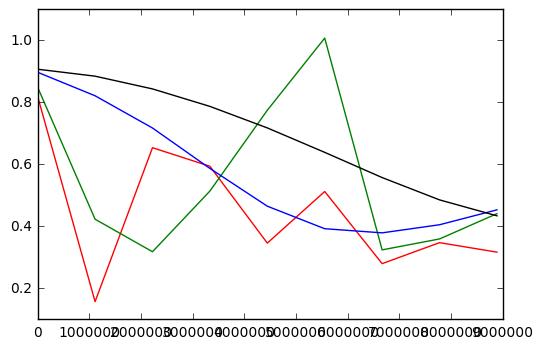

In [64]:
# boost vs time
nT=9
lowBoost=np.zeros(nT)
midBoost=np.zeros(nT)
highBoost=np.zeros(nT)
totBoost=np.zeros(nT)
time=np.zeros(nT)
for i in range(nT):
    r,rho=getDens(16,64,64,64,i,makePlot=1,smoothLength=1)
    lowBoost[i]=findBoost(r,rho,50,100)
    midBoost[i]=findBoost(r,rho,100,200)
    highBoost[i]=findBoost(r,rho,200,500)
    totBoost[i]=findBoost(r,rho,50,500)
    time[i]=(i/nT)*1e7
plt.plot(time,lowBoost,c='r')
plt.plot(time,midBoost,c='g')
plt.plot(time,highBoost,c='b')
plt.plot(time,totBoost,c='k')
plt.show()

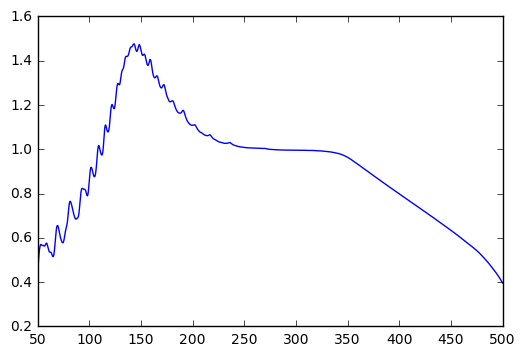

In [15]:
plt.plot(r,rho)